### Predictions
1. The higher the debt to income ratio a borrower has, the greater the risk of default.
1. The number of accounts increases the credit risk
1. High interest rates are generally associated with higher risk.
1. Significant number of derogatory marks increases risk.


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the data
file_path = os.path.join("./Resources/lending_data.csv")
cr = pd.read_csv(file_path)
cr.head()

# Define the X (features) and y (target) sets
y = cr['loan_status'].values
X = cr.drop('loan_status', axis=1)

In [ ]:
# X, y = make_classification(random_state=1, n_features=7, n_informative=5, n_redundant=0)
# X = pd.DataFrame(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [3]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


In [5]:
feature_importances = clf.feature_importances_
for i,v in enumerate(feature_importances):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.12907
Feature: 1, Score: 0.27414
Feature: 2, Score: 0.17452
Feature: 3, Score: 0.15868
Feature: 4, Score: 0.11890
Feature: 5, Score: 0.00008
Feature: 6, Score: 0.14461


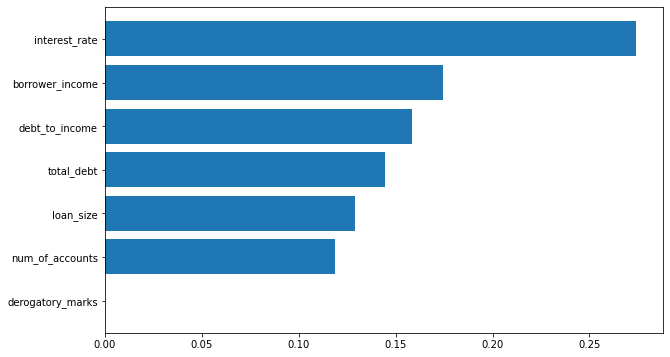

In [6]:
features = sorted(zip(X.columns, clf.feature_importances_), key=lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10, 6)
plt.margins(y=0.05)
ax.barh(y=cols, width=width)

plt.show()


### The bar chart illustrates that there might be only one significant "feature" for credit risk: interest rates!
### Borrower income is a distant second and is more closely aligned to the other features.

In [7]:
from sklearn.feature_selection import SelectFromModel

In [9]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [10]:
# Train a Logistic Regression model print the model score
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [13]:
lr = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [14]:
lreg = LogisticRegression()
lreg.fit(X_selected_train, y_train)
print(f'Training Score: {lreg.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lreg.score(X_selected_test_scaled, y_test)}')

Training Score: 0.6263241161095061
Testing Score: 0.6255674783326455


## Apply the Logistic Regression Model/Confusion Model

In [15]:
crl = pd.read_csv("./Resources/lending_data.csv")
crl.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [16]:
import matplotlib.pyplot as plt
X = crl[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]
y = crl['loan_status']

print('Shape: ', X.shape, y.shape)

Shape:  (77536, 7) (77536,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier

LogisticRegression(max_iter=1000)

In [19]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


### Logistic Regression/Importance Coeficient

Feature: 0, Score: 0.00461
None
Feature: 1, Score: -0.00000
None
Feature: 2, Score: -0.00116
None
Feature: 3, Score: 0.00002
None
Feature: 4, Score: -0.00000
None
Feature: 5, Score: 0.00008
None
Feature: 6, Score: 0.00026
None


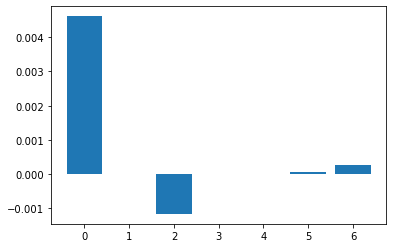

In [21]:
importance = classifier.coef_[0]
for i,v in enumerate(importance):
    print(print('Feature: %0d, Score: %.5f' % (i,v)))

plt.bar([x for x in range(len(importance))], importance)
plt.show()


### The importance coefficient is pretty telling! It suggests that loan size is the strongest indicator. I'm somewhat skeptical of this, though.

### Decision Tree Regressor

Feature: 0, Score: 0.00320
Feature: 1, Score: 0.00193
Feature: 2, Score: 0.20265
Feature: 3, Score: 0.00151
Feature: 4, Score: 0.00213
Feature: 5, Score: 0.77001
Feature: 6, Score: 0.01857


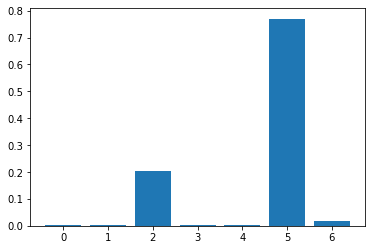

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0


In [22]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
X, y = make_regression(n_samples=1000, n_features=7, n_informative=4, random_state=1)
model = DecisionTreeRegressor()
model.fit(X,y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()
pd.read_csv('./Resources/lending_data.csv').head(1)

### This suggests that derogatory remarks are predictive. I find that unlikely. 

In [23]:
# Make predictions
predictions = classifier.predict(X_test)
print(f"First 25 predictions:   {predictions[:25]}")
print(f"First 25 actual labels: {y_test[:25].tolist()}")

First 25 predictions:   [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
First 25 actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
# Introduce the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18663,   102],
       [   56,   563]])

In [25]:
TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()

In [26]:
print(f'The TP is: {TP}')
print(f' The TN is: {TN}')
print(f'The FP is: {FP}')
print(f'The FN is: {FN}')

The TP is: 563
 The TN is: 18663
The FP is: 102
The FN is: 56


In [28]:
accuracy = (TP + TN) / (TP + FP + TN + FN)
print(f'Accuracy: {accuracy.round(4)}')

precision = TP / (TP + FN)
print(f'Precision: {precision.round(4)}')

sensitivity = TP / (TP + FP)
print(f'Sensitivity: {sensitivity.round(4)}')

f1 = 2 * precision * sensitivity / (precision + sensitivity)
print(f'F1 Score: {f1.round(4)}')

# classifier.fit(X_train, y_train)
# confusion_matrix(y, classifier.predict(X))
# print(' ')
# print('------------------------------------------------------')
# print(' ')
# print(classification_report(y_true, y_pred))


Accuracy: 0.9918
Precision: 0.9095
Sensitivity: 0.8466
F1 Score: 0.8769
